In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist  #Importing the MNIST fashion dataset
(x_train, y_train), (x_test, y_test) = fashion.load_data()

4422102/4422102 [==============================] - 2s 0us/step


Image Label:  0


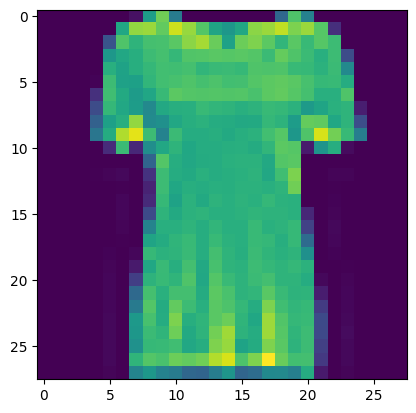

In [7]:
# Sample image from the dataset
imgIndex = 10
image = x_train[imgIndex]       # show image for the image at index -> imgIndex
print("Image Label: ", y_train[imgIndex])   #print the label for the image at index -> ImgIndex
plt.imshow(image)

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
model = keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28), name='input_layer'),
    keras.layers.Dense(300, activation= 'relu', name='hiddden_layer_1'),
    keras.layers.Dense(100,activation='relu', name='hideen_layer_2'),
    keras.layers.Dense(10, activation='softmax', name='output_layer')
    ])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hiddden_layer_1 (Dense)     (None, 300)               235500    
                                                                 
 hideen_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Splitting training data into training and validation sets
xvalid, xtrain= x_train[:5000]/255.0, x_train[5000:]/255.0  # sets are divided by 255 because the image pixels range to 255: dividding by 255 reduces the range from 0 to 1 to reduce complexity
yvalid, ytrain= y_train[:5000], y_train[5000:]

In [21]:
#Training the model
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'sgd',
              metrics= ["accuracy"])
history= model.fit(xtrain, ytrain, epochs=30,
                   validation_data= (xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7179 - accuracy: 0.7631 - val_loss: 0.4971 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4905 - accuracy: 0.8292 - val_loss: 0.4360 - val_accuracy: 0.8542
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4452 - accuracy: 0.8454 - val_loss: 0.4129 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4187 - accuracy: 0.8525 - val_loss: 0.4024 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3988 - accuracy: 0.8599 - val_loss: 0.3798 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3833 - accuracy: 0.8652 - val_loss: 0.4017 - val_accuracy: 0.8536
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3694 - accuracy: 0.8681 - val_loss: 0.3647 - val_accuracy

In [22]:
# Predictions
new= x_test[:5]
pred= model.predict(new)
print(pred)

1/1 [==============================] - 0s 179ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [23]:
# Predicted classes
classes= np.argmax(pred, axis=1)
print(classes)

[9 2 1 1 6]


In [26]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

The model classifies data correctly